In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM 
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#infiltrated data
import pandas
import numpy as np


df1 = pandas.read_csv('/content/drive/MyDrive/irigation/InfiltratedData.csv',usecols=[1])
df1 = df1. dropna()

df2 = pandas.read_csv('/content/drive/MyDrive/irigation/InfiltratedData.csv',usecols=[3])
df2 = df2. dropna()


df3 = pandas.read_csv('/content/drive/MyDrive/irigation/InfiltratedData.csv',usecols=[7])
df3 = df3. dropna()

df4 = pandas.read_csv('/content/drive/MyDrive/irigation/InfiltratedData.csv',usecols=[9])
df4 = df4. dropna()

In [ ]:
#advanced data
import pandas
import numpy as np


df1 = pandas.read_csv('/content/drive/MyDrive/irigation/advancedData.csv',usecols=[0])
df1 = df1. dropna()

df2 = pandas.read_csv('/content/drive/MyDrive/irigation/advancedData.csv',usecols=[1])
df2 = df2. dropna()


df3 = pandas.read_csv('/content/drive/MyDrive/irigation/advancedData.csv',usecols=[3])
df3 = df3. dropna()

df4 = pandas.read_csv('/content/drive/MyDrive/irigation/advancedData.csv',usecols=[4])
df4 = df4. dropna()

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
from tensorflow import keras

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [ ]:
import matplotlib.pyplot as plt

def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.legend()
    plt.show()


In [ ]:

# create and fit the LSTM network
look_back = 1
model = Sequential()
model.add(LSTM(10, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', metrics=['mae', 'mse'], optimizer='adam')
#model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

34 8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

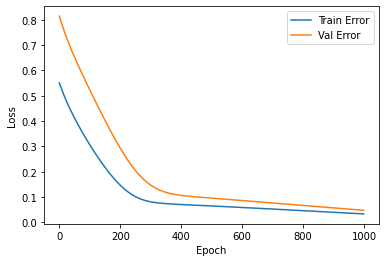

Train Score: 3.82 RMSE
Test Score: 5.77 RMSE


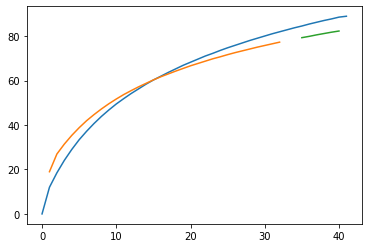

43 10

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................................................
Final Root Mean Absolute Error on validation set: 0.055


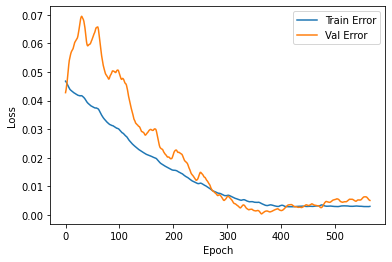

Train Score: 0.19 RMSE
Test Score: 0.58 RMSE


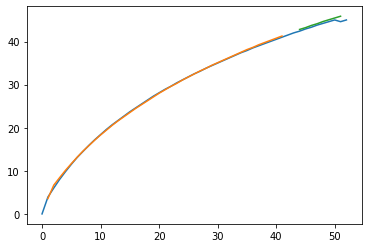

69 15

....................................................................................................
....................................................................................................
..............................................................................
Final Root Mean Absolute Error on validation set: 0.058


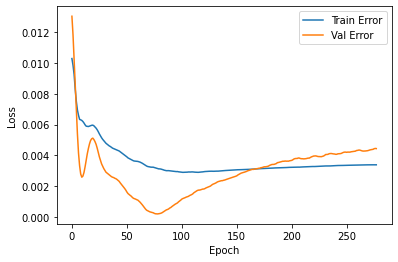

Train Score: 0.79 RMSE
Test Score: 1.09 RMSE


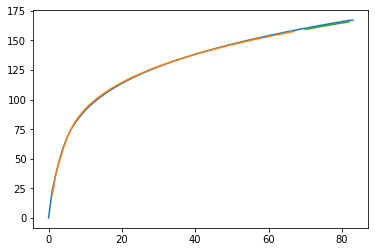

63 14

....................................................................................................
....................................................................................................
...............................................................
Final Root Mean Absolute Error on validation set: 0.051


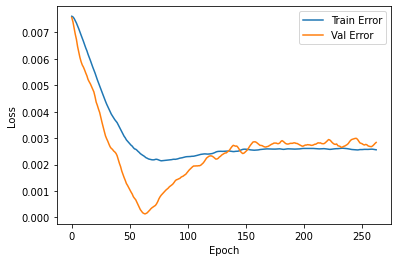

Train Score: 1.13 RMSE
Test Score: 6.93 RMSE


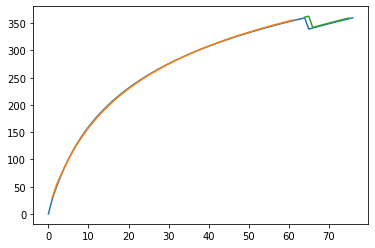

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping, ModelCheckpoint
import math


series = np.array([df1,df2,df3,df4])
for df in series:
  # load the dataset
  dataset = df.values
  dataset = dataset.astype('float32')
  # normalize the dataset
  scaler = MinMaxScaler(feature_range=(0, 1))
  dataset = scaler.fit_transform(dataset)

  # split into train and test sets
  train_size = int(len(dataset)*0.83)
  test_size = len(dataset)-train_size
  train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
  print(len(train), len(test))
  # reshape into X=t and Y=t+1
  
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)

  trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  
  early_stop = EarlyStopping(monitor='val_loss', patience=200)
  checkpoint = ModelCheckpoint('model.h5', monitor='loss', verbose=1, save_best_only=True, mode='min', period=1)
  history = model.fit(trainX, trainY, epochs=1000, verbose=0, validation_split = 0.15, callbacks=[early_stop, PrintDot()])
  
  hist = pandas.DataFrame(history.history)
  hist['epoch'] = history.epoch

  rmse_final = np.sqrt(float(hist['mae'].tail(1)))
  print()
  print('Final Root Mean Absolute Error on validation set: {}'.format(round(rmse_final, 3)))

  plot_history()

  # make predictions
  trainPredict = model.predict(trainX)
  testPredict = model.predict(testX)
  # invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform([trainY])
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform([testY])
  # calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
  print('Train Score: %.2f RMSE' % (trainScore))
  testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
  print('Test Score: %.2f RMSE' % (testScore))


  # shift train predictions for plotting
  trainPredictPlot = np.empty_like(dataset)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
  # shift test predictions for plotting
  testPredictPlot = np.empty_like(dataset)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
  # plot baseline and predictions
  plt.plot(scaler.inverse_transform(dataset))
  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()
 

    

[[1.        ]
 [0.6666641 ]
 [0.40000153]
 [0.        ]] (4, 1)
input x [[1.       ]
 [0.6666641]] (2, 1)
input y [0.6666641  0.40000153] (2,)
input x [[[1.       ]]

 [[0.6666641]]]
input y [[0.1027 0.1023]]
predicted y [[0.10321252]
 [0.10271626]]


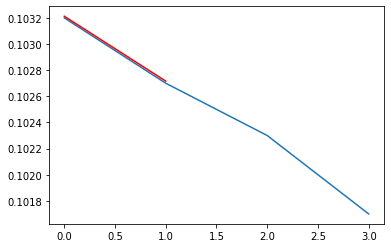

In [ ]:
look_back = 1
# inputs = [80.1,81.1,82,82.9,83.8,84.6,85.5,86.3]
inputs = [0.1032, 0.1027, 0.1023, 0.1017]
# inputs = [80.1,81.1,82, 82.9]
inputs = pandas.DataFrame(inputs, columns=['name'])


# print("input x",inputsX)
dataset = inputs.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
inputs = scaler.fit_transform(dataset)

print(inputs, inputs.shape)
inputsX, inputsY = create_dataset(inputs, look_back)
print("input x",inputsX, inputsX.shape)
print("input y",inputsY, inputsY.shape)
inputsX = np.reshape(inputsX, (inputsX.shape[0], 1, inputsX.shape[1]))
# inputsY = np.reshape(inputsY, (inputsY.shape[0], 1, inputsY.shape[1]))
print("input x",inputsX)
# inputsX = [[0.9952738 ]] [[1.        ]] [[0.942452  ]] [[0.9482902 ]] [[0.95385045]] [[0.9594106 ]] [[0.9646928 ]] [[0.970253  ]] [[0.9752571 ]] [[0.9805394 ]] [[0.9855435 ]] [[0.99054766]]
inputsY = scaler.inverse_transform([inputsY])
print("input y",inputsY)
predictinputY = model.predict(inputsX )
predictinputY = scaler.inverse_transform(predictinputY)
print("predicted y", predictinputY)

plt.plot(scaler.inverse_transform(inputs))
plt.plot(predictinputY, 'r')
plt.plot(inputsY, 'c')
plt.show()
